## 3 Linear Regression: Exercises
My solutions for the exercises in chapter 3.

### Conceptual

#### 1. 
Describe the null hypotheses to which the p-values given in Table 3.4 correspond. Explain what conclusions you can draw based on these
p-values. Your explanation should be phrased in terms of `sales`, `TV`, `radio` , and `newspaper` , rather than in terms of the coefficients of the linear model.

This is Table 3.4:

|               | Coefficient | Std. Error | t-Statistic | p-Value   |
|---------------|-------------|------------|-------------|-----------|
| Intercept     | 2.939       | 0.3119     | 9.42        | < 0.0001  |
| `TV`          | 0.046       | 0.0014     | 32.81       | < 0.0001  |
| `radio`       | 0.189       | 0.0086     | 21.89       | < 0.0001  |
| `newspaper`   | -0.001      | 0.0059     | -0.18       | 0.8599    |

- The p-values each individually (without taking synergy into account) respond to the null hypothesis that the corresponding predictor has no predicting power on the target, the `sales`.
- For instance, the low p-value of < 0.0001 for `TV` answers to the null hypothesis, that TV advertisement is not a predictive factor for how high the `sales` are. Because the p-values is extremely low, is is very unlikely that we have found the evidence by chance. So we have to reject the null hypothesis. Same argument for `radio`.
- On the other hand, the p-value of 0.8599 for the `newspaper` feature is very high. It is corresponding to the null hypothesis, that newspaper advertisement is not a predictive factor for how high the `sales` are. And since we have found out that it is very likely to get results like this by pure chance, using the p-value, we fail to reject the null hypothesis.

#### 2.
Carefully explain the differences between the KNN classifier and KNN regression methods.

- Both methods start the same way by remembering all the data $X$ passed to the model in fit() (at least in scikit-learn that happens during fit; statsmodels accepts X and y during the init already).

- When we pass new data for prediction, both methods would access the K nearest neighbours of this data using some defaults or user-passed distance method.

- KNN classifier then by default counts the mayority class of the K nearest neighbours and returns it as a prediction for the new data point.

- KNN regression by default averages the predictions of the K nearest neighbours and returns it as a prediction for the new data point.

#### 3.
Suppose we have a data set with five predictors, $X_1 = GPA$, $X_2 = IQ$, $X_3 = Level$ (1 for College and 0 for High School), $X_4 =$ Interaction between GPA and IQ, and $X_5 =$ Interaction between GPA and Level. The response is starting salary after graduation (in thousands of dollars). Suppose we use least squares to fit the model, and get $\hat{\beta}_0 = 50, \hat{\beta}_1 = 20, \hat{\beta}_2 = 0.07, \hat{\beta}_3 = 35, \hat{\beta}_4 = 0.01, \hat{\beta}_5 = -10$.

(a) Which answer is correct, and why?

- i. For a fixed value of IQ and GPA, high school graduates earn more, on average, than college graduates.
- ii. For a fixed value of IQ and GPA, college graduates earn more, on average, than high school graduates.
- iii. For a fixed value of IQ and GPA, high school graduates earn more, on average, than college graduates provided that the GPA is high enough.
- iv. For a fixed value of IQ and GPA, college graduates earn more, on average, than high school graduates provided that the GPA is high enough.

    - Answer ii. is correct, because $\hat{\beta}_3$ shows a that for college graduates the entry level salary is on average 35.000 US-Dollar higher than for highschool graduates if we fix GPA and IQ, at least if we assume that our sample we trained on is large and random enough to make such predictions (which it is most likely not). Without the assumption, we can still say that in our data, college graduates earn more on average than high school graduates.
    - Answer iv. in particular is incorrect, because $\hat{\beta}_5$ modifies the influence on GPA in starting salary for college students so that GPA is less a factor for the hight of their starting salary.
    
    

(b) Predict the salary of a college graduate with IQ of 110 and a GPA of 4.0.

In [2]:
prediction = 50 + 4*20 + 110*0.07 + 1*35 + (4*110)*0.01 + (1*4)*-10
prediction

137.1

(c) True or false: Since the coefficient for the GPA/IQ interaction term is very small, there is very little evidence of an interaction effect. Justify your answer.

- False. How much evidence there is for an effect and the size of an effect are two separate things.

#### 4.
I collect a set of data ($n$ = 100 observations) containing a single predictor and a quantitative response. I then fit a linear regression model to the data, as well as a separate cubic regression, i.e. $Y = β_0 + β_1X + β_2X^2 + β_3X^3 + \epsilon$.

(a) Suppose that the true relationship between $X$ and $Y$ is linear, i.e. $Y = β_0 + β_1X + \epsilon$. Consider the training residual sum of squares (RSS) for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.

- If we consider only the training RSS, there is a good chance that a high degree polynomial will be able to fit well to all the samples, especially since we only have 100 of them. Any of the scenarios can happen, depending on the variance of the irreducible error. If it is low, I would expect the linear regression model to outperform the polynomial model on the training data. If it is high, probably, the polynomial model will find a better fit (over fitting, since we know the true relationship is linear) on the training data than the linear model.

(b) Answer (a) using test rather than training RSS.

- On the test data, the linear model will have a lower RSS, since the true data has a linear relationship as well and the polynomial model with degree 3 will have over fit on the training data and thus have a lot of bias on the test data.

(c) Suppose that the true relationship between X and Y is not linear, but we don’t know how far it is from linear. Consider the training RSS for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the
other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.

- In this case, I would expect the polynomial model to have a lower RSS, because it can bend (fit itself) better to the data.

(d) Answer (c) using test rather than training RSS.

- That cannot be answered, it depends on how much the true relationship differs from linear and on many other factors.

#### 5.
Consider the fitted values that result from performing linear regression without an intercept. In this setting, the $i$ th fitted value takes the form </br>
$\hat{y}_i = x_i \hat{\beta}$,

where $\hat{\beta} = \frac{\sum_{i=1}^{n} x_i y_i}{\sum_{i'=1}^{n} x_{i'}^2}$.

Show that we can write $\hat{y}_i = \sum_{i'=1}^{n} a_{i'} y_{i'}$.

What is $a_{i^′}$?

Note: We interpret this result by saying that the fitted values from linear regression are linear combinations of the response values.

- After spending half a day on it without finding out how to start this task, this is the [most comprehensible solution](https://rpubs.com/toleafar/219579) I found on the internet, and also some other solutions [like this one](https://www.lackos.xyz/itsl/Chapter3/conceptual), which are less clear than the first one, because they play around with the indices too much.

- Some things I discovered/learned along the way:

    - The formula for $\hat{\beta}$ was given in section 3.1.1, in the part "Optimization method: normal equation": $\hat{\beta} = \frac{\sum_{i=1}^{n} x_i y_i}{\sum_{i=1}^{n} x_{i}^2}$
    
    - The normal equation $X^TX\hat{\beta}​=X^Ty$ can also be written $\left( \sum_{i=1}^{n} x_i^2 \right) \hat{\beta} = \sum_{i=1}^{n} x_i y_i$ and solving for $\hat{\beta}$ gives the formula above.

    - I have researched about the strange index $i^′$ (which was not used in the book before, not even in section 3.1.1) and I have found out that $i^′$ is just to say that this is another index than the other $i$. It could also have been named $j$ and it could actually also be named $i$, since it is clearly used in different summations.

    - In the formula  $\hat{y}_i = \sum_{i'=1}^{n} a_{i'} y_{i'}$, the multiplication happens **before** the summation. In summation notation, it's a convention that the summation applies to the entire term immediately following the summation symbol.

    - $\hat{y}_i$ (and $x_i$ respectively) are *single values* and not vectors! Outside of summation symbols, variables with an index, represent the $i$ th value, not the whole vector.

    - It seems I should practice manipulating formulas containing summation symbols, which I did [here](https://github.com/StefanieSenger/mathy_coding/blob/main/summations.ipynb) before coming back here.

- Summing up:

    - $\hat{y}_i = x_i \frac{\sum_{j=1}^{n} x_j y_j}{\sum_{i'=1}^{n} x_{i'}^2} = \frac{x_i}{\sum_{i'=1}^n x_{i'}^2} \cdot \sum_{j=1}^n x_j y_j = \sum_{j=1}^n \frac{x_i x_{j}}{\sum_{i'=1}^n x_{i'}^2} y_{j} = \sum_{j=1}^{n} a_{j} y_{j}$

        - where $\frac{x_i}{\sum_{i'=1}^n x_{i'}^2}$ is a specific scalar value for each $i$ that normalises the contribution of each $x_i$​ to the prediction $\hat{y}_i$ making it proportional to the overall magnitude of the data

            - it is a scalar because it is the quotient of two single values: $x_i$​ is a single value for a specific observation $i$ and $\sum_{i'=1}^n x_{i'}^2$ is the sum of all $x_{i'}^2$​ which doesn't change based on the summation index $i′$, so the term is a single value as well

            - being specific to each observation $i$ means tha the value of this scalar depends on which $i$ we're looking at, but it does not depend on the $x_{i'}^2$ that appear in the summation

        - since it is a scalar, it applies uniformly across the summation and thus it can be pulled into the summation; we use a new summation index $j$ to avoid confusion

        - in $\sum_{j=1}^n \frac{x_i x_{j}}{\sum_{i'=1}^n x_{i'}^2}$, both indices $i$ and $i'$ now have fixed roles:

            - $i$ refers to the specific observation for which you're calculating $\hat{y}_i$

            - $i′$ is used for summing over the squares of the $x_{i'}$ and remains a constant sum value, so the summation doesn't change its value with respect to $i'$

            - the indices $i$ and $i'$ are part of the sum but now refer to different summations; they don't "interact" or need to be manipulated in this expression anymore once the sum over $i'$ has been evaluated
    
    - And finally: what is $a_{i^′}$? This is a scalar of weights that multiplied with the true target, leave us with the predicted target ...  ¯\\\_(ツ)_/¯


#### 6.
Using $\hat{\beta}_0 = \bar{y} − \hat{\beta}_1 \bar{x}$ and $\hat{\beta}_1 = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2}$, argue that in the case of simple linear regression, the least squares line always passes through the point ($\bar{x}, \bar{y}$).

- regression line formula: $\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x$ --> $0 = \hat{\beta}_0 + \hat{\beta}_1 x - \hat{y}$

- substituting $\hat{y}$ with $\bar{y}$ and $x$ with $\bar{x}$: $0 = \hat{\beta}_0 + \hat{\beta}_1 \bar{x} - \bar{y}$

- substituting formulas for $\hat{\beta}_0$ and $\hat{\beta}_1$: </br>

    $$0 = \hat{\beta}_0 + \hat{\beta}_1 \bar{x} - \bar{y}$$

    $$0 = \bar{y} − \hat{\beta}_1 \bar{x} + \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2} \bar{x} - \bar{y}$$

    $$0 = − \hat{\beta}_1 \bar{x} + \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2} \bar{x}$$

    $$0 = − \hat{\beta}_1 \bar{x} + \hat{\beta}_1 \bar{x}$$

    $$0 = 0$$

#### 7.
skipped

### Applied

#### 8. 
This question involves the use of simple linear regression on the `Auto` data set.

- (a) Use the `sm.OLS()` function to perform a simple linear regression with `mpg` as the response and `horsepower` as the predictor. Use the `summarize()` function to print the results. Comment on the output. For example:
    - i. Is there a relationship between the predictor and the response?
    - ii. How strong is the relationship between the predictor and the response?
    - iii. Is the relationship between the predictor and the response positive or negative?
    - iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals?

In [3]:
import statsmodels.api as sm
import pandas as pd
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)

data = load_data("Auto")
data[:5]


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [4]:
import numpy as np
y = data["mpg"]
X = pd.DataFrame ({'intercept ': np.ones(data.shape[0]), 'horsepower ': data['horsepower']})
X[:4]

,intercept,horsepower
name,,
chevrolet chevelle malibu,1.0,130
buick skylark 320,1.0,165
plymouth satellite,1.0,150
amc rebel sst,1.0,150


In [5]:
model = sm.OLS(y, X)
results = model.fit()
summarize(results) 

,coef,std err,t,P>|t|
intercept,39.9359,0.717,55.660,0.0
horsepower,-0.1578,0.006,-24.489,0.0


In [6]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sat, 18 Jan 2025   Prob (F-statistic):           7.03e-81
Time:                        16:13:53   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept      39.9359      0.717     55.660      0.000      38.525      41.347
horsepower     -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- i. Is there a relationship between the predictor and the response?

    - There is a negative relationship: with every horsepower more, that a car has, the number of miles per galleon it can drive shrinks by 0.1578.

- ii. How strong is the relationship between the predictor and the response?

    - I needed to use `results.summary()` as well in order to see the $R²$ statistic, which is 0.606. This means the relationship is moderately strong. It's an indicator that the relationship is quite relevant.

- iii. Is the relationship between the predictor and the response positive or negative?

    - negative

- iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals?

In [7]:
# by hand
mpg_pred = 98 * (-0.1578) + 39.9359
mpg_pred

24.4715

In [8]:
# using model
new_df = pd.DataFrame ({'intercept ': [1], 'horsepower ': [98]})
mpg_pred = results.get_prediction(new_df)
mpg_pred.predicted_mean

array([24.46707715])

In [9]:
# confidence interval
mpg_pred.conf_int(alpha=0.05)

array([[23.97307896, 24.96107534]])

In [10]:
# prediction interval
mpg_pred.conf_int(obs=True, alpha=0.05)

array([[14.80939607, 34.12475823]])


- (b) Plot the response and the predictor in a new set of axes `ax`. Use the `ax.axline()` method or the `abline()` function defined in the lab to display the least squares regression line.

/tmp/ipykernel_150161/3840810155.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abline(ax ,results.params [0], results.params [1], 'r--', linewidth =3);


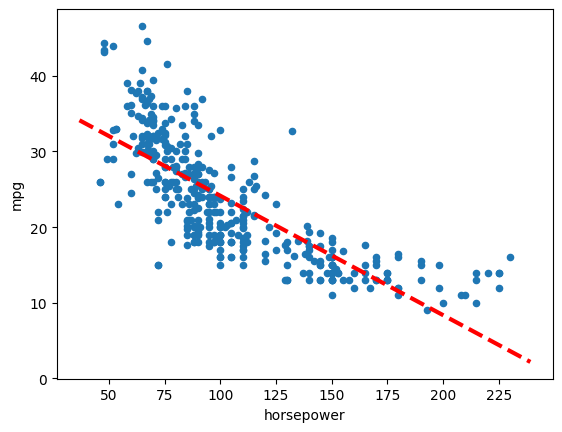

In [11]:
def abline(ax , b, m, *args , ** kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim ()
    ylim = [m * xlim [0] + b, m * xlim [1] + b]
    ax.plot(xlim , ylim , *args , ** kwargs)

ax = data.plot.scatter('horsepower', 'mpg')
abline(ax ,results.params [0], results.params [1], 'r--', linewidth =3);

- (c) Produce some of diagnostic plots of the least squares regression fit as described in the lab. Comment on any problems you see with the fit.

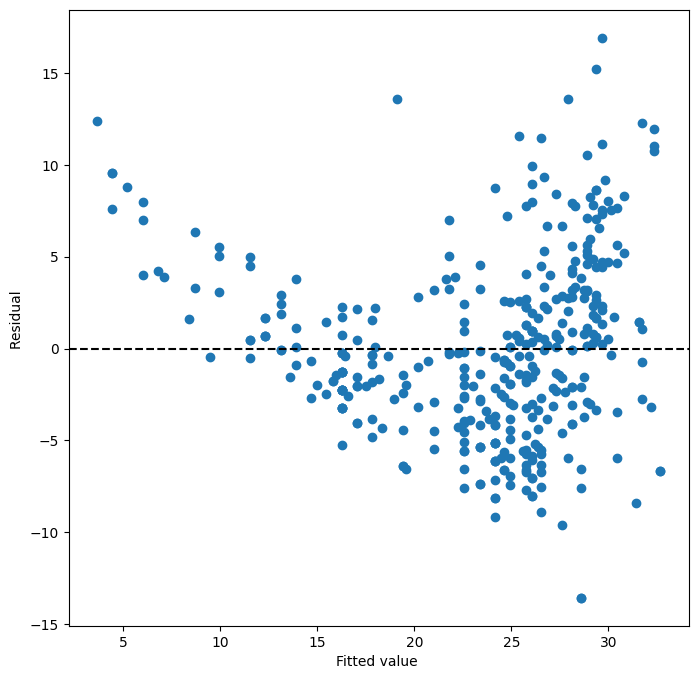

In [12]:
# making a residual plot as described in 3.3
from matplotlib.pyplot import subplots
ax = subplots(figsize =(8 ,8))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Fitted value ')
ax.set_ylabel('Residual ')
ax.axhline(0, c='k', ls='--');

It seems the relationship between predictor and target is not linear: We can see a polynomial pattern, most probably quadratic.

115

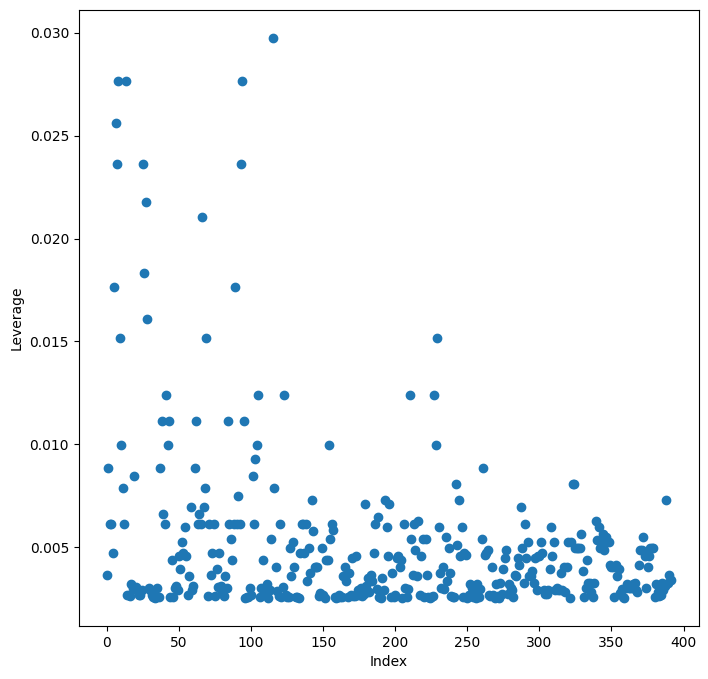

In [13]:
# plot leverage statistics
import numpy as np
infl = results.get_influence()
ax = subplots(figsize =(8 ,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

Some data we have for the lower indexes are leveraging the prediction quite a lot, since they are far from the rest of the data. Now, we have to inspect which data this would affect, for instance with np.argmax():

In [14]:
np.argmax(results.get_influence().hat_matrix_diag)

115

Datapoint at the index 115 influences the prediction line a lot.

In [15]:
data.iloc[115,:]

mpg               16.0
cylinders          8.0
displacement     400.0
horsepower       230.0
weight          4278.0
acceleration       9.5
year              73.0
origin             1.0
Name: pontiac grand prix, dtype: float64

It is a car with a lot of horsepower (230) but quite good expenditure (mpg=16). We need to check if this is valid data and if so, we still need to decide if we want to base our general model's prediction also on this brand.

#### 9.
This question involves the use of multiple linear regression on the `Auto` data set.

- (a) Produce a scatterplot matrix which includes all of the variables in the data set.

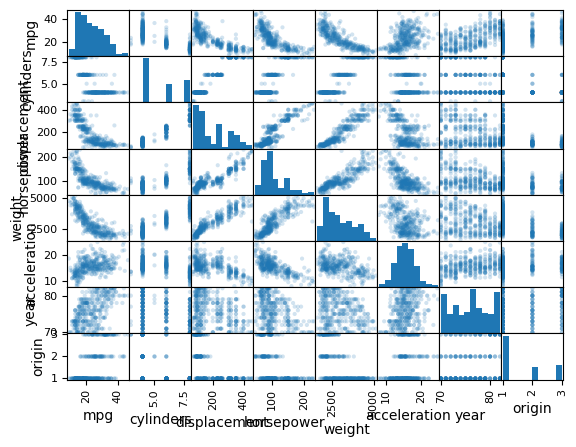

In [16]:
pd.plotting.scatter_matrix(data, alpha=0.2);

- (b) Compute the matrix of correlations between the variables using the `DataFrame.corr()` method. 

In [17]:
data.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


- (c) Use the `sm.OLS()` function to perform a multiple linear regression with `mpg` as the response and all other variables except `name` as the predictors. Use the `summarize()` function to print the results. Comment on the output. For instance:
    - i. Is there a relationship between the predictors and the response? Use the `anova_lm()` function from `statsmodels` to answer this question.
    - ii. Which predictors appear to have a statistically significant relationship to the response?
    - iii. What does the coefficient for the `year` variable suggest?

In [18]:
y = data["mpg"]
X = MS(data.columns.drop('mpg')).fit_transform(data)
X[:4]

,intercept,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,1.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,1.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,1.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,1.0,8,304.0,150,3433,12.0,70,1


In [19]:
model = sm.OLS(y, X)
results = model.fit()
summarize(results) 

,coef,std err,t,P>|t|
intercept,-17.2184,4.644,-3.707,0.000
cylinders,-0.4934,0.323,-1.526,0.128
displacement,0.0199,0.008,2.647,0.008
horsepower,-0.0170,0.014,-1.230,0.220
weight,-0.0065,0.001,-9.929,0.000
acceleration,0.0806,0.099,0.815,0.415
year,0.7508,0.051,14.729,0.000
origin,1.4261,0.278,5.127,0.000


- i. Is there a relationship between the predictors and the response? Use the `anova_lm()` function from `statsmodels` to answer this question.

In [20]:
results.params

intercept      -17.218435
cylinders       -0.493376
displacement     0.019896
horsepower      -0.016951
weight          -0.006474
acceleration     0.080576
year             0.750773
origin           1.426140
dtype: float64

In [21]:
from statsmodels.stats.anova import anova_lm
anova_lm(results)

AttributeError: 'PandasData' object has no attribute 'design_info'

- It seems my data X doesn't have the required metadata. Not sure why, since I recreated it exactly like in the labs; I will skip this for now.

- ii. Which predictors appear to have a statistically significant relationship to the response?

    - Any with a low p-value: displacement, weight, year, origin.

- iii. What does the coefficient for the `year` variable suggest?

    - With every year a car is older, the it can drive 0.75 miles more per galleon. So newer cars need more gasoline.

- (d) Produce some of diagnostic plots of the linear regression fit as described in the lab. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

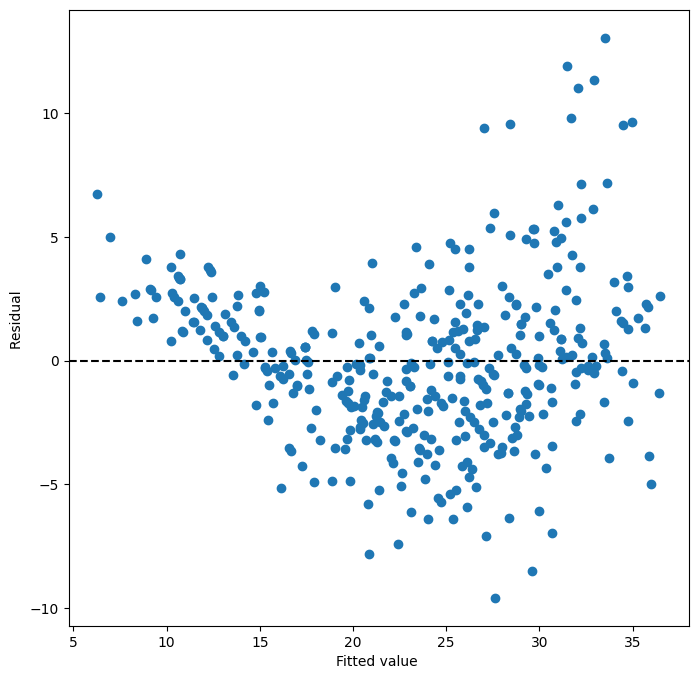

In [22]:
# making a residual plot as described in 3.3
from matplotlib.pyplot import subplots
ax = subplots(figsize =(8 ,8))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Fitted value ')
ax.set_ylabel('Residual ')
ax.axhline(0, c='k', ls='--');

- There is some non-linear relationship going on. If this was not only an exercise, we should inspect the features with the highest $R²$ score individually.

13

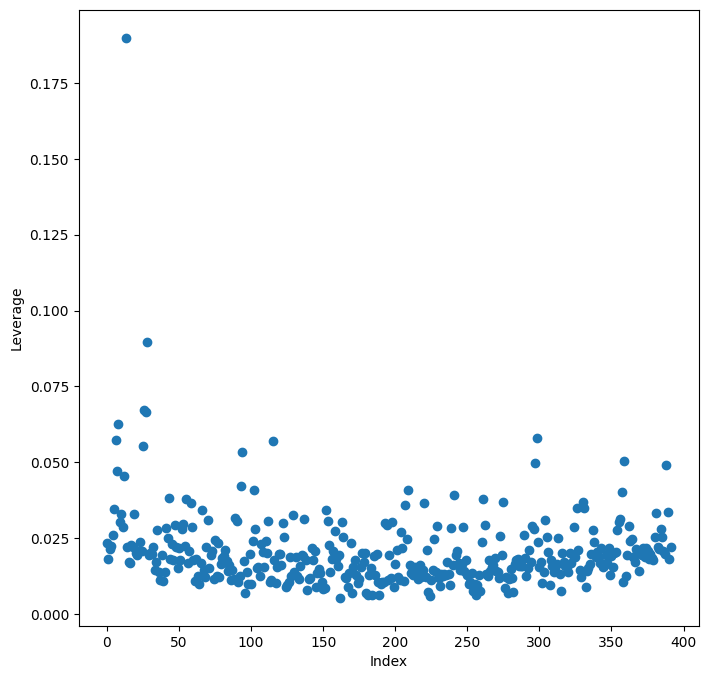

In [23]:
# plot leverage statistics
import numpy as np
infl = results.get_influence()
ax = subplots(figsize =(8 ,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

- The leverage of the samples looks pretty evenly distributed.

(e) Fit some models with interactions as described in the lab. Do any interactions appear to be statistically significant?

In [24]:
data.columns.drop('mpg')

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'year', 'origin'],
      dtype='object')

In [25]:
X = MS(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin', ('weight', 'cylinders'), ('horsepower', 'acceleration')]).fit_transform(data)
X[:4]

,intercept,cylinders,displacement,horsepower,weight,acceleration,year,origin,weight:cylinders,horsepower:acceleration
name,,,,,,,,,,
chevrolet chevelle malibu,1.0,8,307.0,130,3504,12.0,70,1,28032.0,1560.0
buick skylark 320,1.0,8,350.0,165,3693,11.5,70,1,29544.0,1897.5
plymouth satellite,1.0,8,318.0,150,3436,11.0,70,1,27488.0,1650.0
amc rebel sst,1.0,8,304.0,150,3433,12.0,70,1,27464.0,1800.0


In [26]:
model2 = sm.OLS(y, X)
summarize(model2.fit())

,coef,std err,t,P>|t|
intercept,-7.4837,5.516,-1.357,0.176
cylinders,-4.0179,0.588,-6.835,0.000
displacement,-0.0049,0.008,-0.646,0.519
horsepower,0.0807,0.024,3.414,0.001
weight,-0.0120,0.001,-10.024,0.000
acceleration,0.7886,0.151,5.206,0.000
year,0.7814,0.045,17.474,0.000
origin,0.5834,0.255,2.285,0.023
weight:cylinders,0.0013,0.000,8.051,0.000
horsepower:acceleration,-0.0093,0.002,-5.533,0.000


- Yes, both the interaction between 'weight' and 'cylinders' and the interaction between 'horsepower' and 'acceleration' seem to be statistically significant.

(f) Try a few different transformations of the variables, such as log(X), √X, X2. Comment on your findings.

In [27]:
X = MS([poly('horsepower', degree =3)]).fit_transform(data) # adding polynomial features up to specified degree
model3 = sm.OLS(y, X)
results3 = model3.fit()
summarize(results3)

,coef,std err,t,P>|t|
intercept,23.4459,0.221,106.105,0.000
"poly(horsepower, degree=3)[0]",-120.1377,4.375,-27.460,0.000
"poly(horsepower, degree=3)[1]",44.0895,4.375,10.078,0.000
"poly(horsepower, degree=3)[2]",-3.9488,4.375,-0.903,0.367


- It seems like adding quadratic horsepower to the model is a good idea.

- `ISLP.models` doesn't seem to have any other of he mentioned transforms than `poly()`:

In [28]:
displacement = pd.DataFrame(np.log2(data['displacement']))
X = MS(['displacement']).fit_transform(displacement) 
model3 = sm.OLS(y, X)
results3 = model3.fit()
summarize(results3)

,coef,std err,t,P>|t|
intercept,85.6906,2.142,40.001,0.0
displacement,-8.4137,0.288,-29.212,0.0


The displacement of the car engine capacity seems to have a more significant relationship with the mps if we log transform it first. I didn't go too deep into the car sphere to find out if that makes sense, though.

### 10.
This question should be answered using the `Carseats` data set.

In [29]:
data = load_data("Carseats")
data[:5]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


(a) Fit a multiple regression model to predict `Sales` using `Price`, `Urban`, and `US`.

In [36]:
X = MS(data[["Price", "Urban", "US"]]).fit_transform(data)
y = data["Sales"]
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,13.0435,0.651,20.036,0.000
Price,-0.0545,0.005,-10.389,0.000
Urban[Yes],-0.0219,0.272,-0.081,0.936
US[Yes],1.2006,0.259,4.635,0.000


(b) Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative!

- working offline: I cannot access information on the features using `Carseats?` it seems
    - let's assume the sales are in thousands, but I cannot check that right now

- price coefficient (-0.0545): for every one US-dollar a carseat costs more, the sales (in thousands) drop by 0.0545
- Urban coefficient (-0.0219): carseats with Urban=Yes sell a bit less than carseats with Urban=No; but the dependency is not significant
- US coefficient (1.2006): carseats with US=Yes sell 1.2006 (in thousands) more than carseats with US=No

(c) Write out the model in equation form, being careful to handle the qualitative variables properly.

-  this task is a bit unclear to me, because I am not sure if "being careful to handle the qualitative variables properly" is supposed to indicate me that there are interaction terms at play (as described in the [Removing the Additive Assumption part of chapter 3](https://github.com/StefanieSenger/Introduction_to_Statistical_Learning/blob/main/03_linear_regression.ipynb)); on the other hand I cannot see any in the model results

    - actually this part of the book leaves me in the dark if allowing interaction for categorical features is something to take care of when we fit your model or if models do this by default for categorical variables

- without interaction terms, this is the formula:

$$
\text{Sales predicted}_i = 13.0435 - 0.0545 * \text{Price}_i +
\begin{cases} 
-0.0219 + 1.2006 & \text{if $i$th carseat is Urban and US} \\
-0.0219 & \text{if $i$th carseat is Urban and not US} \\
1.2006 & \text{if $i$th carseat is US and not Urban} \\
0 & \text{if $i$th carseat is not Urban and not US}
\end{cases}
$$

(d) For which of the predictors can you reject the null hypothesis $H0 : βj = 0$?

- Price and US because the p-value for each is small enough (below 0.05)

(e) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

In [37]:
X = MS(data[["Price", "US"]]).fit_transform(data)
y = data["Sales"]
reduced_model = sm.OLS(y, X)
results_reduced_model = reduced_model.fit()
summarize(results_reduced_model)

,coef,std err,t,P>|t|
intercept,13.0308,0.631,20.652,0.0
Price,-0.0545,0.005,-10.416,0.0
US[Yes],1.1996,0.258,4.641,0.0


(f) How well do the models in (a) and (e) fit the data?

In [39]:
print(results.rsquared)
print(results_reduced_model.rsquared)

0.23927539218405547
0.23926288842678567


- there is hardly a difference, but with the second model, we have a simpler, more interpretable model, so it is to be preferred
- however we can see that the two predictors that are used ("Price", "US") don't explain the target too well; we should look for other predictors that influence the number of sales

(g) Using the model from (e), obtain 95 % confidence intervals for the coefficient(s).

In [40]:
summarize(results_reduced_model)

,coef,std err,t,P>|t|
intercept,13.0308,0.631,20.652,0.0
Price,-0.0545,0.005,-10.416,0.0
US[Yes],1.1996,0.258,4.641,0.0


In [42]:
results_reduced_model.conf_int(alpha=0.05) # this probably uses the standard error to calculate the confidence interval

,0,1
intercept,11.79032,14.271265
Price,-0.06476,-0.044195
US[Yes],0.69152,1.707766


(h) Is there evidence of outliers or high leverage observations in the model from (e)?

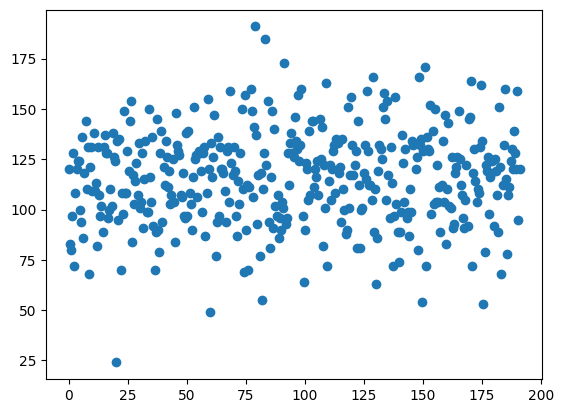

In [ ]:
# inspect visually for outliers
import matplotlib.pyplot as plt
x_line = np.linspace(0, X["Price"].max(), len(X["Price"]))
plt.scatter(x_line, X["Price"]);

One datapoint is a bit farer from the others, but it doesn't look like that data was wrong.

42

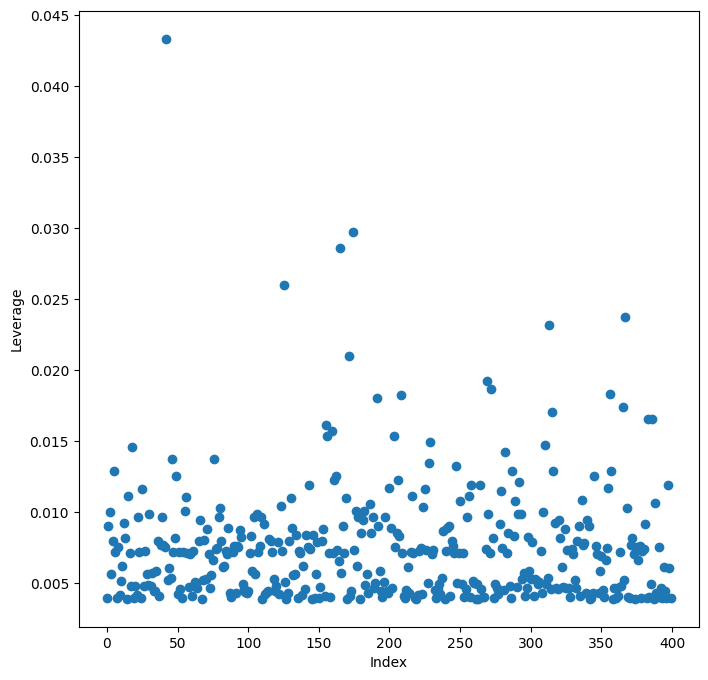

In [43]:
# plot leverage statistics
infl = results_reduced_model.get_influence()
ax = subplots(figsize =(8 ,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

Some data points have a bit higher leverage points than the others, but it's not really strong and the rest of the data looks very even, so I would think that it's nothing to panick about.
(However, here I am rushing through more than 100 tasks while not really having time to do them and if it would matter more to me, I would investigate closer which data points are effected and why they have a higher leverage.)

### 11.
In this problem we will investigate the t-statistic for the null hypothesis `H0 : β = 0` in simple linear regression without an intercept. To begin, we generate a predictor `x` and a response `y` as follows.
```
rng = np.random.default_rng (1)
x = rng.normal(size =100)
y = 2 * x + rng.normal(size =100)
```

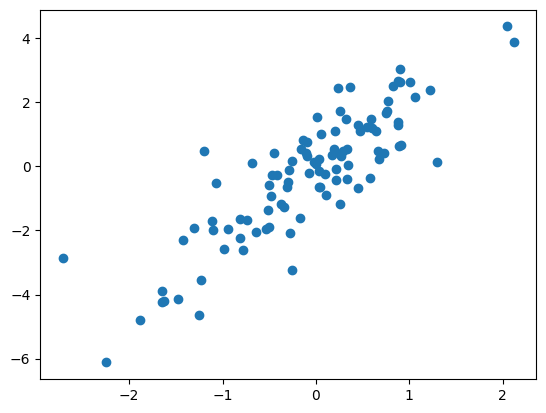

In [143]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = 2 * x + rng.normal(size=100)

plt.scatter(x, y)

(a) Perform a simple linear regression of `y` onto `x`, without an intercept. Report the coefficient estimate $\hat{β}$, the standard error of this coefficient estimate, and the t-statistic and p-value associated with the null hypothesis $H0 : β = 0$. Comment on these results. (You can perform regression without an intercept using the keywords argument `intercept=False` to `ModelSpec()`.)

In [144]:
#this also seems to fit without an intercept
model = sm.OLS(x, y) # statsmodel expects the dependent variable first!
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
x1,0.3757,0.022,16.898,0.0


- `y` has a statistically significant (low p-value) relationship with `x`
- for any `y`, the corresponding value of `x` increases by 1.9762, which fits the data creation process, where we had defined that y should be x multiplied by 2 plus a value
- the standard error measures the variability of the coefficient
- the t-statistic is how many standard errors is the coefficient away from the value 0 (which is the null hypothesis); multiplied with the standard error we can calculate confidence intervals

(b) Now perform a simple linear regression of `x` onto `y` without an intercept, and report the coefficient estimate, its standard error, and the corresponding t-statistic and p-values associated with the null hypothesis $H 0 : β = 0§. Comment on these results.

In [145]:
#this also seems to fit without an intercept
model = sm.OLS(y, x)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
x1,1.9762,0.117,16.898,0.0


- for any `x`, the corresponding value of `y` increases by 0.3757
- there is more noise in `y` than in `x` (because we add random normal variables twice instead of once), which maybe explains the not so steep increase in `y` when `x` is increased ( the lower standard error demonstrates this)
- the t-statistic is the same and I am not sure why

(c) What is the relationship between the results obtained in (a) and (b)?
- they both describe the same relationship (x~y) but from different directions

(d) skipped

(e) skipped

(f) In `R`, show that when regression is performed with an intercept, the t-statistic for $H_0 : β 1 = 0$ is the same for the regression of `y` onto `x` as it is for the regression of `x` onto `y`.
- they mean Python?

In [146]:
x = x.reshape(-1, 1)
x_intercept = np.hstack((np.ones_like(x), x))
x_intercept.shape

(100, 2)

In [147]:
y = y.reshape(-1, 1)
y.shape

(100, 1)

In [150]:
model = sm.OLS(y, x_intercept)
results = model.fit()
summarize(results)


,coef,std err,t,P>|t|
const,-0.0760,0.101,-0.756,0.451
x1,1.9686,0.118,16.734,0.000


In [151]:
y_intercept = np.hstack((np.ones_like(y), y))
model = sm.OLS(x, y_intercept)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
const,0.0095,0.044,0.216,0.829
x1,0.3763,0.022,16.734,0.000


$\hat{\beta} = \frac{\sum_{i=1}^{n} x_i y_i}{\sum_{i'=1}^{n} x_{i'}^2}$

### 12. 
This problem involves simple linear regression without an intercept.

(a) Recall that the coefficient estimate $\hat{β}$ for the linear regression of `Y` onto `X` without an intercept is given by $\hat{\beta} = \frac{\sum_{i=1}^{n} x_i y_i}{\sum_{i'=1}^{n} x_{i'}^2}$. Under what circumstance is the coefficient estimate for the regression of `X` onto `Y` the same as the coefficient estimate for the regression of `Y` onto `X`?

- I wonder if they mean the formula is for the coefficient estimate of `X` onto `Y` (not the other way around); or am I confusing this? (But for this task it doesn't matter.)

$$\frac{\sum_{i=1}^{n} x_i y_i}{\sum_{i=1}^{n} x_{i}^2} = \frac{\sum_{i=1}^{n} x_i y_i}{\sum_{i=1}^{n} y_{i}^2}$$
$$\sum_{i=1}^{n} x_{i}^2 = \sum_{i=1}^{n} y_{i}^2$$

- we can turn `x` and `y` in this formula around if the variance in `x` and `y` is the same, since these two expressions that we stay with describe the variance

- see my comment from 12.(c) to note that the formula seems to isolate the problem to only the slope of the coefficient (excluding the intercept term); my impression is that it's only true for strictly linear relationships (not those that are shifted)

(b) Generate an example in Python with $n = 100$ observations in which the coefficient estimate for the regression of `X` onto `Y` is *different from* the coefficient estimate for the regression of `Y` onto `X`.

- see exercise 11

(c) Generate an example in Python with $n = 100$ observations in which the coefficient estimate for the regression of `X` onto `Y` is *the same as* the coefficient estimate for the regression of `Y` onto `X`.

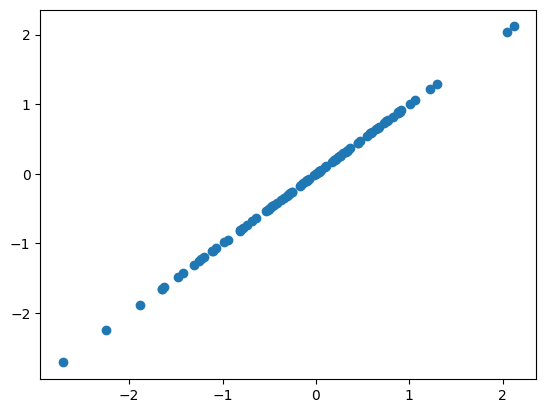

In [174]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x

plt.scatter(x, y)

In [175]:
model = sm.OLS(y, x)
results = model.fit()
summarize(results)

/home/stefanie/.pyenv/versions/3.12.2/envs/isl/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1871: RuntimeWarning: divide by zero encountered in scalar divide
  return self.mse_model/self.mse_resid
/home/stefanie/.pyenv/versions/3.12.2/envs/isl/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:955: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/home/stefanie/.pyenv/versions/3.12.2/envs/isl/lib/python3.12/site-packages/statsmodels/stats/stattools.py:50: RuntimeWarning: invalid value encountered in scalar divide
  dw = np.sum(diff_resids**2, axis=axis) / np.sum(resids**2, axis=axis)


,coef,std err,t,P>|t|
x1,1.0,0,inf,0.0


In [176]:
model = sm.OLS(x, y)
results = model.fit()
summarize(results)

/home/stefanie/.pyenv/versions/3.12.2/envs/isl/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1871: RuntimeWarning: divide by zero encountered in scalar divide
  return self.mse_model/self.mse_resid
/home/stefanie/.pyenv/versions/3.12.2/envs/isl/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:955: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/home/stefanie/.pyenv/versions/3.12.2/envs/isl/lib/python3.12/site-packages/statsmodels/stats/stattools.py:50: RuntimeWarning: invalid value encountered in scalar divide
  dw = np.sum(diff_resids**2, axis=axis) / np.sum(resids**2, axis=axis)


,coef,std err,t,P>|t|
x1,1.0,0,inf,0.0


- in addition to my findings in exercise 12(a), if we don't have an intercept term, y and x must be in the same range more or less; we cannot shift any by adding a constant, because then the regression line is calculated differently

### 13.
In this exercise you will create some simulated data and will fit simple linear regression models to it. Make sure to use the default random number generator with seed set to 1 prior to starting part (a) to ensure consistent results.